# Exploring Dataset

### Notebook Goals

1. Determine which questions should be kept and which ones are not useful for modelling the problem.
2. Scores:
  - How are scores distributed by class.
  - How are scores distributed on a per question basis.
  - How are classes distributed per question.
3. How many questions contain spelling mistakes?

In [1]:
import sys
sys.path.append('../../')
import libs.data as data
import libs.visualization as vis
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = data.load_dataset(language='en', version=2, suffix='extended')
df.head(2)

ID  AID  QID                                             Prompt  \
0  1.1    1    1   What is the role of a prototype program in pr...   
1  1.1    1    1   What is the role of a prototype program in pr...   

                                                  MA  \
0   To simulate the behaviour of portions of the ...   
1   To simulate the behaviour of portions of the ...   

                                                 MA2  \
0  to provide an example and feedback of how the ...   
1  to provide an example and feedback of how the ...   

                                                 MA3  \
0  to serve as a proof of concept and illustrate ...   
1  to serve as a proof of concept and illustrate ...   

                               NA  \
0  to find errors or collect data   
1  to find errors or collect data   

                                                  SA  MyScore  \
0   High risk problems are address in the prototy...        4   
1   To simulate portions of the desired final pro...        5   

           Feedback Feedback_Notes  Score  
0  correct_indirect            NaN    3.5  
1  correct_complete            NaN    5.0

In [59]:
df[df['SA'].str.len() > 40].iloc[29]['SA']

' Refining and possibly the design if the testing phase reveals problems in the design.  Production can be affected if the program is unworkable in its current form which will lead to a later production time than originally estimated.  Also affects coding because after testing you may need to rewrite the code for the program to remove errors. '

Model Answer
 By reference.         15.0
 By rows.              10.0
 File scope.           13.0
 Run-time error.       17.0
 Unlimited number.     19.0
 by reference.         15.0
 push                   6.0
 push and pop          14.0
 queue                  7.0
Name: Model Answer, dtype: float64


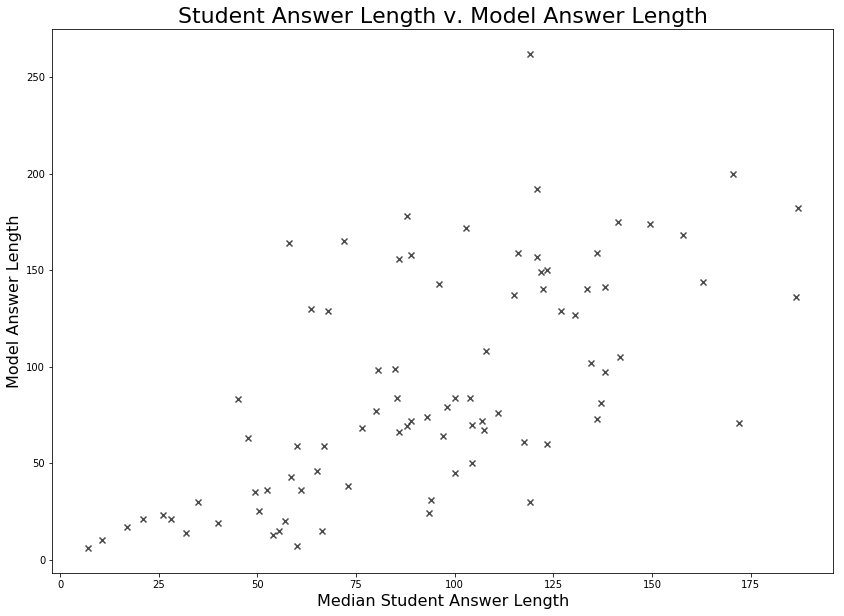

In [73]:


def plot_length_comparisons(df):
    k1 = df.groupby(['MA'])['SA'].apply(lambda x: np.median(x.str.len()))
    k2 = df.groupby(['MA'])['MA'].apply(lambda x: np.median(x.str.len()))
    
    print(k2[k2 < 20])
    
    plt.figure(figsize=(14,10))
    plt.title("Student Answer Length v. Model Answer Length", fontsize=22)
    plt.scatter(k1.values, k2.values, color='k', alpha=0.7, marker='x')
    plt.xlabel('Median Student Answer Length', fontsize=16)
    plt.ylabel('Model Answer Length', fontsize=16)
    plt.savefig('./renderings/length_comparisons.png')
    plt.show()
    
plot_length_comparisons(df)

## Q1: Plot out the Categorical Distribution of the variables in a comparative barplot

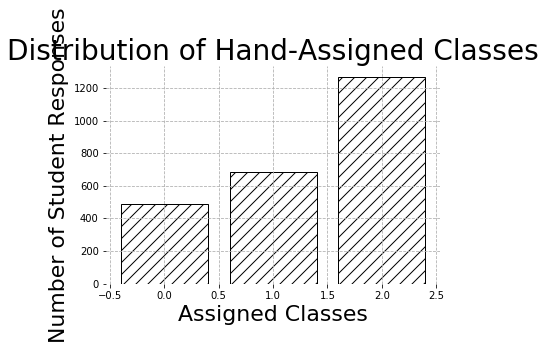

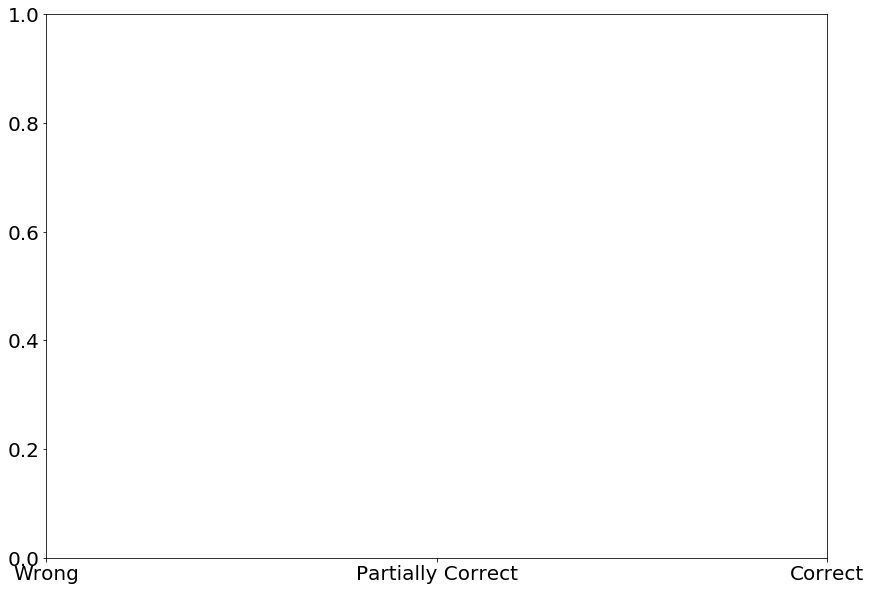

In [9]:
from cycler import cycler
# Styles
monochrome = (cycler('color', ['k']) * cycler('linestyle',
                                              ['-', '--', ':', '=.']) * cycler('marker', ['^', ',', '.']))
bar_cycle = (cycler('hatch', ['///', '--', '...', '\///', 'xxx',
                              '\\\\']) * cycler('color', 'w')*cycler('zorder', [10]))
styles = bar_cycle()


def class_comparisons_barplots(df, save=None):
    
    wrong_idxs = df['Feedback'].str.contains('wrong')
    pc_idxs = df['Feedback'].str.contains('partially_correct')
    correct_idxs = df['Feedback'].str.contains('correct_')
    
    x = np.arange(3)
    class_scores = [wrong_idxs.sum(), pc_idxs.sum(), correct_idxs.sum()]
    class_labels = ['Wrong', 'Partially Correct', 'Correct'] 
    
    fig, ax = plt.subplots(1, 1)
    plt.figure(figsize=(14,10))
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    ax.set_prop_cycle(monochrome)

    # Grid Setup
    ax.grid(linestyle='--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Labels
    ax.set_title('Distribution of Hand-Assigned Classes', size=28)
    ax.set(xlabel='Assigned Classes')
    ax.xaxis.label.set_fontsize(22)
    ax.xaxis.padlabel = 30
    ax.set(ylabel='Number of Student Responses')
    ax.yaxis.label.set_fontsize(22)

    # Render
    ax.bar(x, class_scores, align='center', hatch='//', fill=False)
    
    plt.xticks(x, class_labels)
    if save:
        plt.savefig('./renderings/{}.png'.format(save))
    plt.show()
    

class_comparisons_barplots(df)

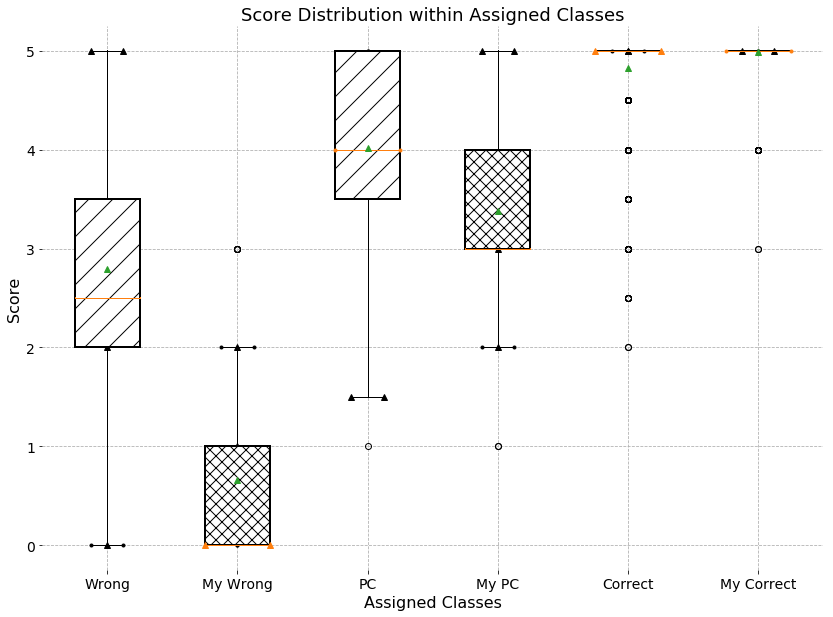

In [36]:
def class_box_and_whiskers(df):
    wrong_idxs = df['Feedback'].str.contains('wrong')
    pc_idxs = df['Feedback'].str.contains('partially_correct')
    correct_idxs = df['Feedback'].str.contains('correct_')
    
    # Wrong scores
    wrong_s1 = df[wrong_idxs]['Score'].values
    wrong_s2 = df[wrong_idxs]['MyScore'].values
    
    # Partially Correct scores
    pc_s1 = df[pc_idxs]['Score'].values
    pc_s2 = df[pc_idxs]['MyScore'].values
    
    # Correct scores
    correct_s1 = df[correct_idxs]['Score'].values
    correct_s2 = df[correct_idxs]['MyScore'].values
    
    data = [wrong_s1, wrong_s2, pc_s1, pc_s2, correct_s1, correct_s2]
    
    fig, ax = plt.subplots(1, 1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.set_prop_cycle(monochrome)

    # Grid Setup
    ax.grid(linestyle='--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Labels
    ax.set_title('Score Distribution within Assigned Classes', size=18)
    ax.set(xlabel='Assigned Classes')
    ax.xaxis.label.set_fontsize(16)
    ax.set(ylabel='Score')
    ax.yaxis.label.set_fontsize(16)
    
    # Plot
    bp = ax.boxplot(data, patch_artist=True, showmeans=True)
    plt.xticks([1,2,3,4,5,6], ['Wrong', 'My Wrong', 'PC', 'My PC', 'Correct', 'My Correct'])
    
    idx = 0
    for box in bp['boxes']:
        # change outline color
        box.set(color='k', linewidth=2)
        # change fill color
        box.set(facecolor = 'white' )
        # change hatch
        if idx % 2 == 0:
            box.set(hatch = '/')
        else:
            box.set(hatch = 'xx')
        idx += 1
    
    plt.savefig('./renderings/box_and_whiskers_score_comparisons.png')
    plt.show()

class_box_and_whiskers(df)

## Q1.2: Plot Score Distribution for all 5 Classes

2442


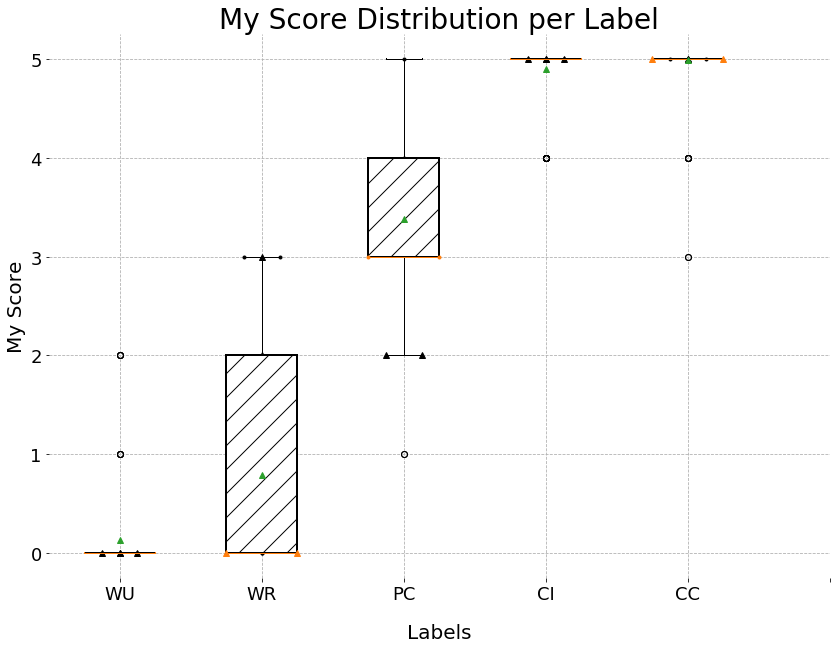

In [72]:
def class_box_and_whiskers_labels5(df):
    wrong1_idxs = df['Feedback'].str.contains('wrong_unrelated')
    wrong2_idxs = df['Feedback'].str.contains('wrong_related')
    pc_idxs = df['Feedback'].str.contains('partially_correct')
    c1_idxs = df['Feedback'].str.contains('correct_indirect')
    c2_idxs = df['Feedback'].str.contains('correct_complete')
    
    print(wrong1_idxs.sum() + wrong2_idxs.sum() + pc_idxs.sum() + c1_idxs.sum() + c2_idxs.sum())
    
    # Wrong scores
    wrong_s1 = df[wrong1_idxs]['MyScore'].values
    wrong_s2 = df[wrong2_idxs]['MyScore'].values
    
    # Partially Correct scores
    pc_s1 = df[pc_idxs]['MyScore'].values
    
    # Correct scores
    correct_s1 = df[c1_idxs]['MyScore'].values
    correct_s2 = df[c2_idxs]['MyScore'].values
    
    data = [wrong_s1, wrong_s2, pc_s1, correct_s1, correct_s2]
    
    fig, ax = plt.subplots(1, 1)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    ax.set_prop_cycle(monochrome)

    # Grid Setup
    ax.grid(linestyle='--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Labels
    ax.set_title('My Score Distribution per Label', size=28)
    ax.set(xlabel='Labels')
    ax.xaxis.label.set_fontsize(20)
    ax.xaxis.labelpad = 20
    ax.set(ylabel='My Score')
    ax.yaxis.label.set_fontsize(20)
    
    # Plot
    bp = ax.boxplot(data, patch_artist=True, showmeans=True)
    plt.xticks([1,2,3,4,5,6], ['WU', 'WR', 'PC', 'CI', 'CC'])
    
    idx = 0
    for box in bp['boxes']:
        # change outline color
        box.set(color='k', linewidth=2)
        # change fill color
        box.set(facecolor = 'white' )
        # change hatch
        box.set(hatch = '/')
    
    plt.savefig('./renderings/score_distribution_within_custom_5labels_myScores.png')
    plt.show()

class_box_and_whiskers_labels5(df)

## Q2: Plot the Breakdown after Division into Binary Classification Problem

1. Reasoning: use MyScore < 2.5 b/c myscores split up the data more cleanly than the regular Score field.
2. Threshold of < 2 since this covers all the wrong labels and only inculdes a very few (outliers) from partially correct and no correct entries.

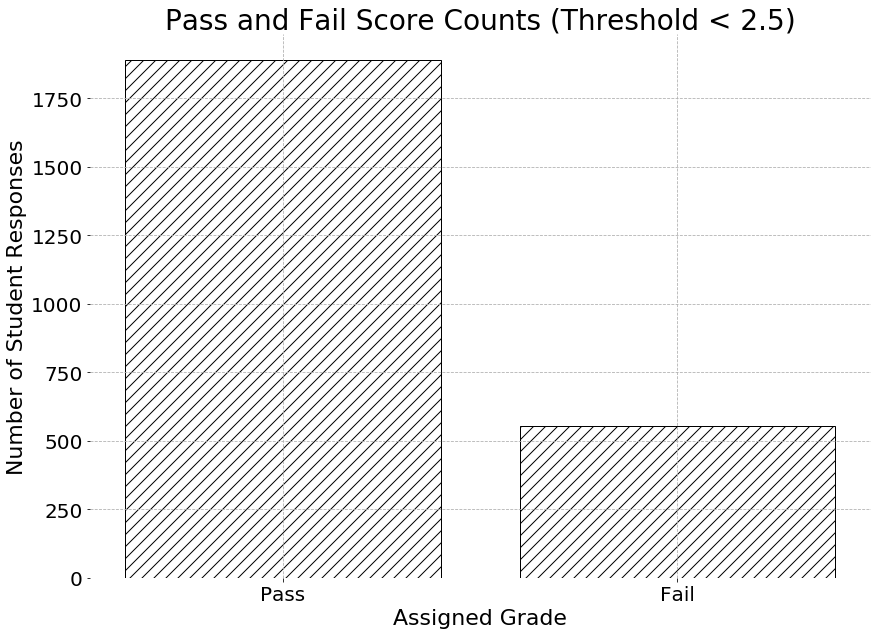

In [81]:
def plot_binary_class_split(df, save=None):
    fail_idxs = df['MyScore'] <= 2
    
    pass_df = df[~fail_idxs]
    fail_df = df[fail_idxs]
    
    x = np.arange(2)
    class_scores = [len(pass_df), len(fail_df)]
    class_labels = ['Pass', 'Fail'] 
    
    fig, ax = plt.subplots(1, 1)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    ax.set_prop_cycle(monochrome)

    # Grid Setup
    ax.grid(linestyle='--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Labels
    ax.set_title('Pass and Fail Score Counts (Threshold < 2.5)', size=28)
    ax.set(xlabel='Assigned Grade')
    ax.xaxis.label.set_fontsize(22)
    #ax.xaxis.labelpad = 30
    ax.set(ylabel='Number of Student Responses')
    ax.yaxis.label.set_fontsize(22)

    # Render
    ax.bar(x, class_scores, align='center', hatch='//', fill=False)
    
    plt.xticks(x, class_labels)
    
    if save:
        plt.savefig('./renderings/{}.png'.format(save))
    plt.show()
    
plot_binary_class_split(df)

## Q3: How many wrong unrelated questions are there?

In [4]:

df[df['Feedback'].str.contains('wrong_unrelated')]['Score'].count() / df[df['Feedback'].str.contains('wrong_')]['Score'].count()

0.1894093686354379

## Q4: Which questions are really short?

1. Questions which have a short model answer or short student responses aren't necessarily problematic.
2. What we want to find are questions like: "Which method is used to put an element on the stack?" Answer: "push".
3. These questions are better left for a Fill-In-The-Blank style question IMHO.

### Keep vs. Remove

1. We want to keep all responses which allow for a resonable amount of text.
2. Any response which is one to two words should be removed from the dataset. (This is simply a different question type all-together)

### Remove

```
Maybe: 1.4, 3.2, 7.4, 11.1, 11.3
Definite: 2.5, 4.3, 4.6, 4.7, 8.2, 9.2, 9.6, 9.7, 11.2, 11.6, 12.7
Keep: 6.2, 6.5, 10.3, 11.5, 12.1
```

Remove Decisions: 1.4, 3.2, 7.4, 11.3, 2.5, 4.3, 4.6, 4.7, 8.2, 9.2, 9.6, 9.7, 11.2, 11.6, 12.7

Keep Deicisons: 6.2, 6.5, 10.3, 11.1, 11.5, 12.1

In [4]:
import pandas as pd
df_en = pd.read_csv("../../datasets/final/en/asag_v2_en_full.csv", sep='~')

In [6]:
df_short_ma = df_en[df_en['MA'].str.len() < 40]

qids = df_short_ma['ID'].unique()
display(qids)

remove_ids = [1.4, 3.2, 7.4, 11.3, 2.5, 4.3, 4.6, 4.7, 8.2, 9.2, 9.6, 9.7, 11.2, 11.6, 12.7]
filtered_df = df_en[~df_en['ID'].isin(remove_ids)]

array([ 1.3,  1.4,  2.5,  3.2,  4.3,  4.6,  4.7,  6.2,  6.5,  7.4,  8.2,
        9.2,  9.6,  9.7, 10.3, 11.1, 11.2, 11.3, 11.5, 11.6, 12.1, 12.7])

2010


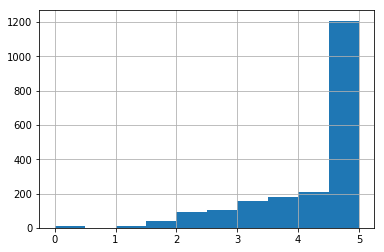

In [8]:
filtered_df['Score'].hist()
print(len(filtered_df))

In [11]:
#filtered_df.to_csv("../../datasets/final/en/asag_v2_en_filter.csv", sep='~', index=False)

# German
#df_de = pd.read_csv("../../datasets/final/de/asag_v2_de_full.csv", sep='~')
#df_de_filt = df_de[~df_de['ID'].isin(remove_ids)]
#print(len(df_de_filt))
#df_de_filt.to_csv("../../datasets/final/de/asag_v2_de_filter.csv", sep='~', index=False)

# Spanish
df_es = pd.read_csv("../../datasets/final/es/asag_v2_es_full.csv", sep='~')
df_es_filt = df_es[~df_es['ID'].isin(remove_ids)]
print(len(df_es_filt))
df_es_filt.to_csv("../../datasets/final/es/asag_v2_es_filter.csv", sep='~', index=False)

2010


In [12]:
df_fib = df_en[df_en['ID'].isin(remove_ids)]
df_fib.to_csv("../../datasets/final/en/asag_v2_en_fitb.csv", sep='~')

df_de_fib = df_de[df_de['ID'].isin(remove_ids)]
df_de_fib.to_csv("../../datasets/final/de/asag_v2_de_fitb.csv", sep='~')

df_es_fib = df_es[df_es['ID'].isin(remove_ids)]
df_es_fib.to_csv("../../datasets/final/es/asag_v2_es_fitb.csv", sep='~')

## Filtered Dataset Inspection

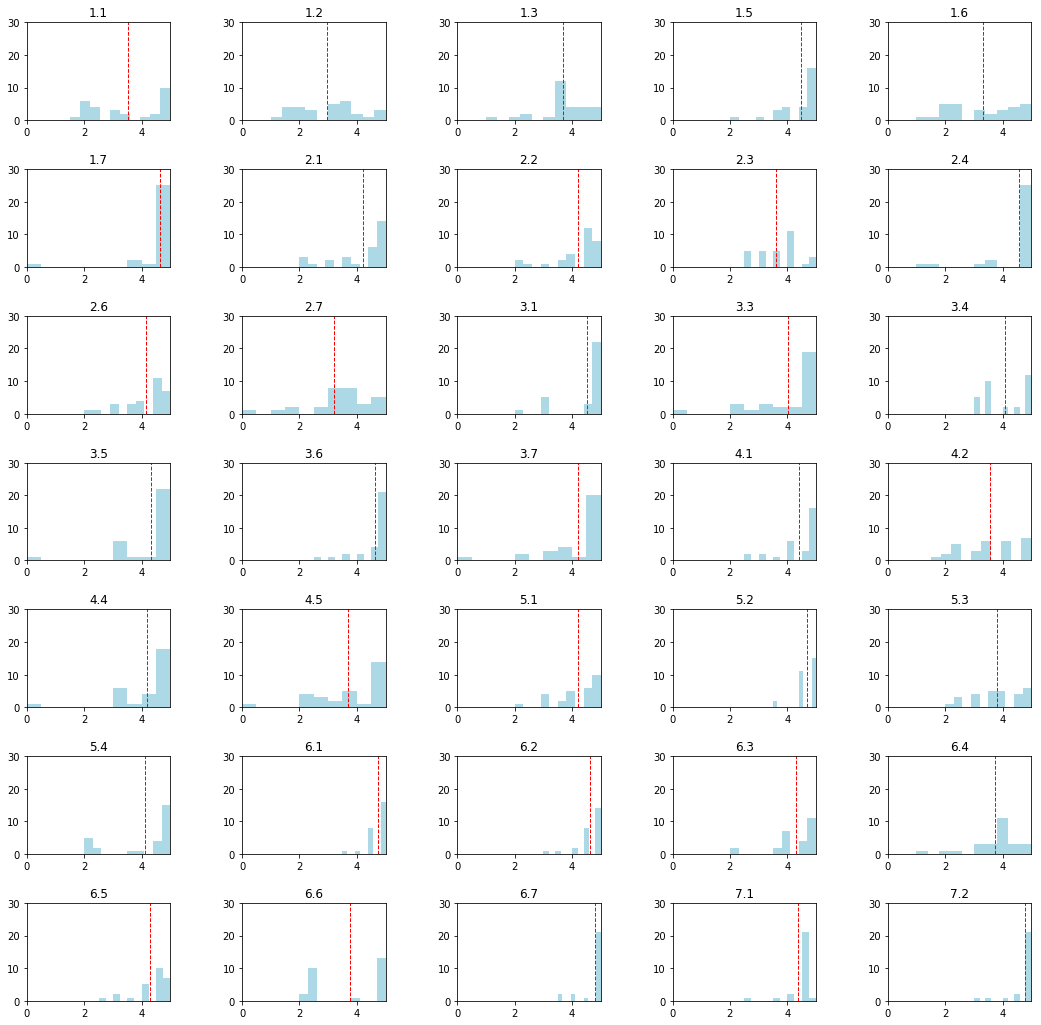

In [26]:
d1 = filtered_df[filtered_df['ID'] <= 7.2] # len == 35
d2 = filtered_df[filtered_df['ID'] > 7.2] # len == 35 

vis.plot_assignment_and_question_histograms(d1, 7, 5)

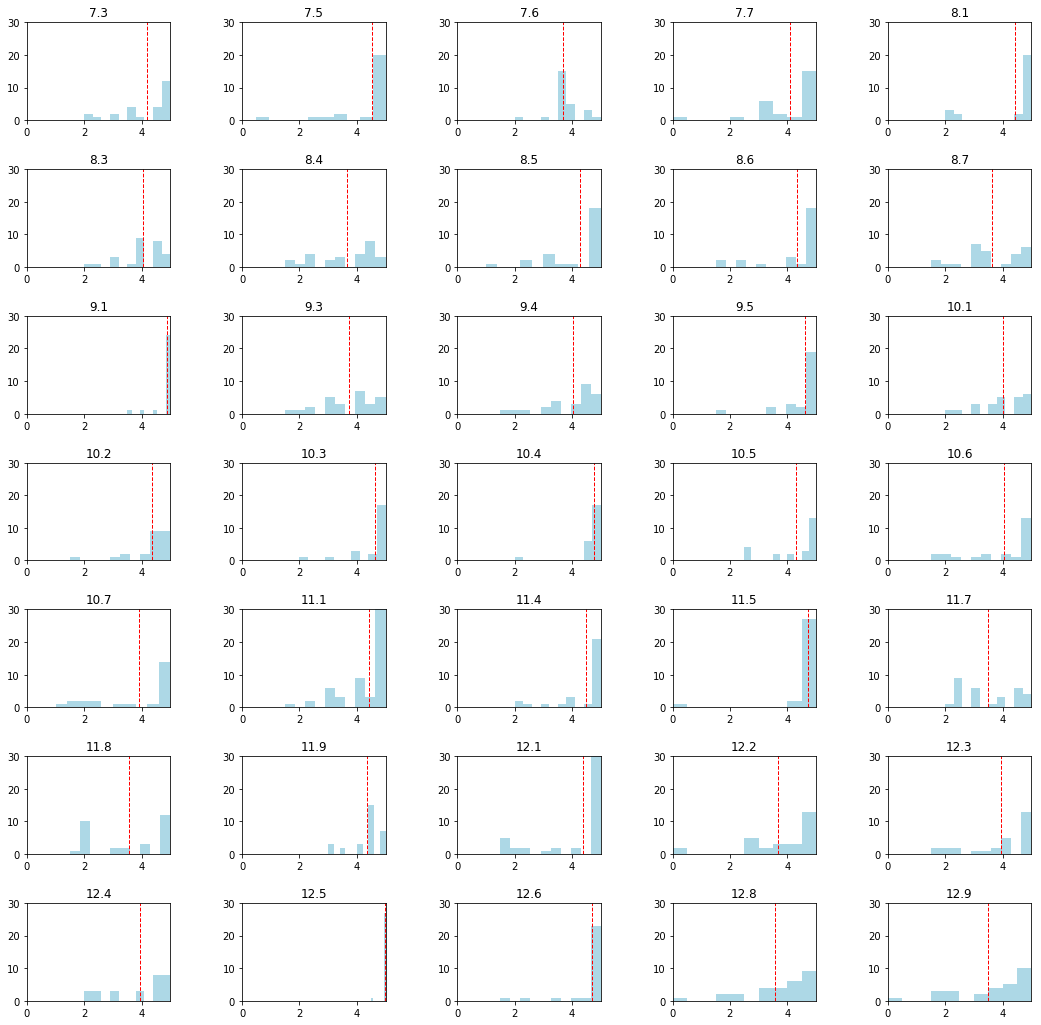

In [8]:
vis.plot_assignment_and_question_histograms(d2, 7, 5)

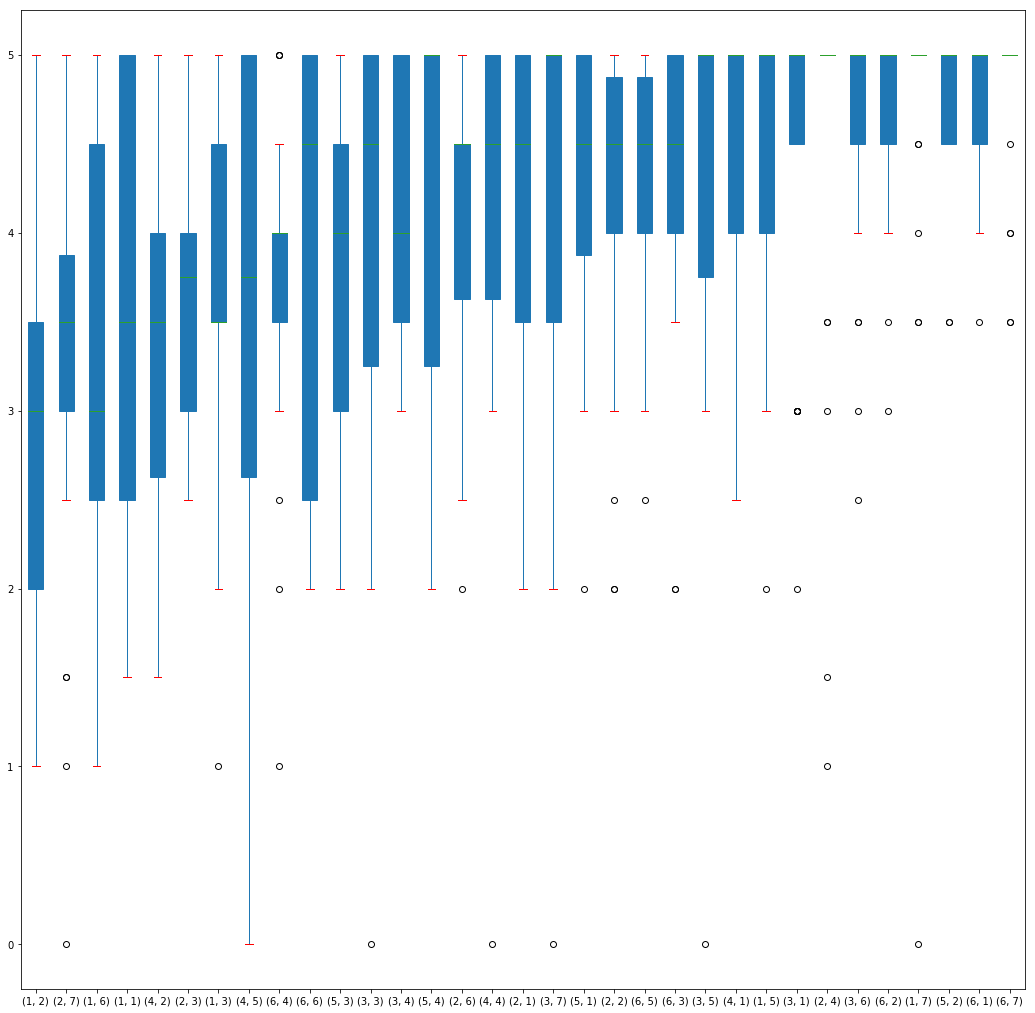

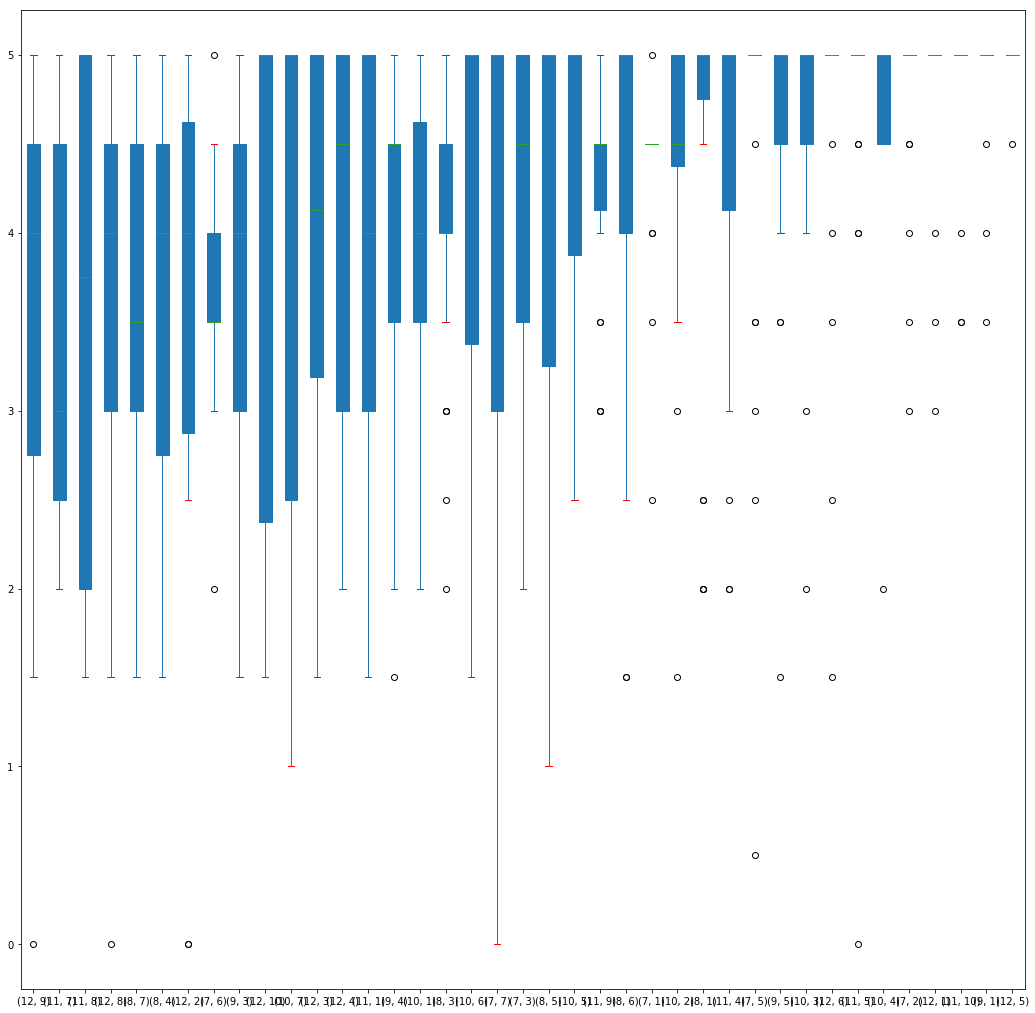

In [95]:
reload(vis)
vis.plot_assignment_and_question_boxplot(filtered_df[filtered_df['ID'] < 7])
vis.plot_assignment_and_question_boxplot(filtered_df[filtered_df['ID'] >= 7])

In [27]:
df2 = filtered_df.copy()
print(len(df2))
df2['Class_Score'] = np.zeros(len(df2))
correct_idxs = df2['Feedback'].str.contains('correct')
partial_idxs = df2['Feedback'].str.contains('partial')
wrong_idxs = df2['Feedback'].str.contains('wrong')
df2.loc[correct_idxs, 'Class_Score'] = 2
df2.loc[partial_idxs, 'Class_Score'] = 1
df2.loc[wrong_idxs, 'Class_Score'] = 0

2010


In [11]:
df2.head(1)

ID  AID  QID                                             Prompt  \
0  1.1    1    1   What is the role of a prototype program in pr...   

                                        Model Answer  \
0   To simulate the behaviour of portions of the ...   

                                      Student Answer  MyScore  \
0   High risk problems are address in the prototy...        4   

           Feedback Feedback_Notes  Score  Class_Score  
0  correct_indirect            NaN    3.5          2.0